Entrenamiento personalizado --- avanzado
===

* *30 min* | Última modificación: Julio 12, 2019.

## Preparación

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: True


## Dataset

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(
    fname=os.path.basename(train_dataset_url),
    origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/vagrant/.keras/datasets/iris_training.csv


## Inspección de datos

In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
column_names = [
    'sepal_length', 
    'sepal_width', 
    'petal_length', 
    'petal_width', 
    'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [5]:
class_names = [
    'Iris setosa', 
    'Iris versicolor', 
    'Iris virginica']

In [6]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

W0712 15:33:06.306769 140281357952832 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0712 15:33:06.308225 140281357952832 deprecation.py:323] From <ipython-input-6-b38e4b2864a1>:8: make_csv_dataset (from tensorflow.contrib.data.python.ops.readers) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.
W0712 15:33:06.330770 140281357952832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/ops/readers.py:499: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a fut

In [7]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
              array([4.8, 5.4, 7. , 5. , 5.8, 5. , 5.5, 4.4, 5.9, 7.7, 7.7, 5.8, 6.2,
                     6.1, 6.9, 7.2, 6.1, 4.7, 5.5, 7.2, 6.1, 5.2, 6. , 6.9, 5.3, 6.1,
                     4.9, 4.7, 5.4, 6.6, 7.4, 6. ], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([3.1, 3.4, 3.2, 3.6, 2.8, 3.4, 2.6, 3.2, 3.2, 3. , 3.8, 2.6, 2.8,
                     2.6, 3.1, 3.2, 2.9, 3.2, 2.4, 3.6, 3. , 3.4, 2.9, 3.1, 3.7, 2.8,
                     3.1, 3.2, 3.7, 3. , 2.8, 2.7], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=63, shape=(32,), dtype=float32, numpy=
              array([1.6, 1.5, 4.7, 1.4, 5.1, 1.5, 4.4, 1.3, 4.8, 6.1, 6.7, 4. , 4.8,
                     5.6, 4.9, 6. , 4.7, 1.3, 3.8, 6.1, 4.9, 1.4, 4.5, 5.1, 1.5, 4.7,
                     1.5, 1.6, 1.5, 4.4, 6.1, 5.1],

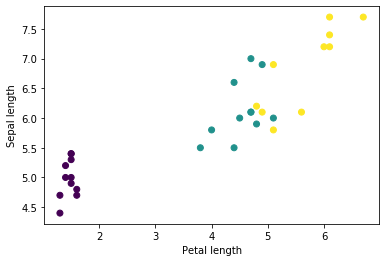

In [8]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show();

In [9]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [10]:
train_dataset = train_dataset.map(pack_features_vector)

In [11]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [7.  3.2 4.7 1.4]
 [5.  3.6 1.4 0.2]
 [5.8 2.8 5.1 2.4]], shape=(5, 4), dtype=float32)


## Especificación del modelo

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, 
                        activation=tf.nn.relu, 
                        input_shape=(4,)),
    
  tf.keras.layers.Dense(10, 
                        activation=tf.nn.relu),
    
  tf.keras.layers.Dense(3)
])

## Uso del modelo

In [13]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=206, shape=(5, 3), dtype=float32, numpy=
array([[ 0.39389262,  0.89719063, -1.6299461 ],
       [ 0.51496124,  0.9582363 , -1.8475792 ],
       [ 0.41143307,  2.6989605 , -2.2921774 ],
       [ 0.44771802,  0.79480183, -1.7335105 ],
       [ 0.40526047,  2.7814465 , -2.1271746 ]], dtype=float32)>

In [14]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [0 0 1 0 2 0 1 0 1 2 2 1 2 2 1 2 1 0 1 2 2 0 1 2 0 1 0 0 0 1 2 1]


## Función de pérdida

In [15]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.108886241912842


## Cómputo del gradiente

In [16]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Optimizador

In [17]:
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.01)

global_step = tf.Variable(0)

In [18]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.108886241912842
Step: 1,         Loss: 1.676639199256897


## Entrenamiento

In [19]:
from tensorflow import contrib

tfe = contrib.eager

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()


    for x, y in train_dataset:
    
        loss_value, grads = grad(model, x, y)
        
        optimizer.apply_gradients(
            zip(grads, model.trainable_variables),
            global_step)

        epoch_loss_avg(loss_value)

        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        msg = "Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}"
        print(msg.format(epoch,
                         epoch_loss_avg.result(),
                         epoch_accuracy.result()))

Epoch 000: Loss: 1.430, Accuracy: 65.000%
Epoch 050: Loss: 0.297, Accuracy: 97.500%
Epoch 100: Loss: 0.182, Accuracy: 98.333%
Epoch 150: Loss: 0.135, Accuracy: 98.333%
Epoch 200: Loss: 0.113, Accuracy: 99.167%


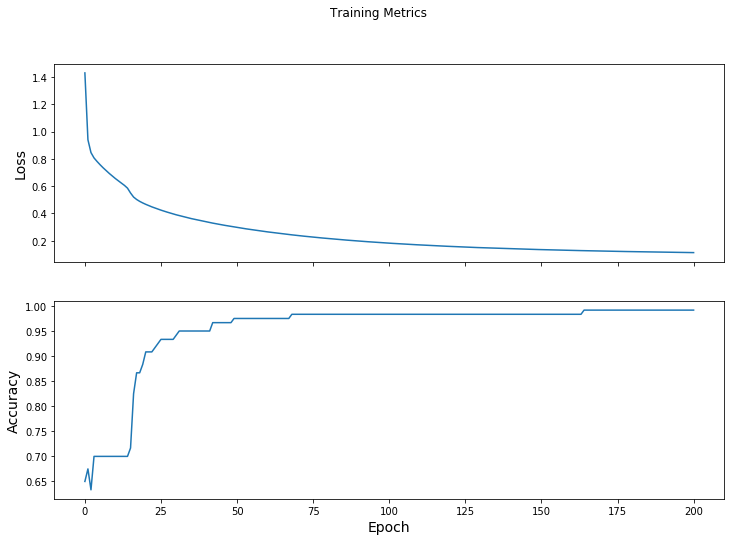

In [20]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## Evaluación del modelo

In [21]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(
    fname=os.path.basename(test_url),
    origin=test_url)

In [22]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [23]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [24]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=105681, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

## Uso del modelo

In [25]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.0%)
Example 1 prediction: Iris versicolor (88.7%)
Example 2 prediction: Iris virginica (92.1%)
